In [1]:
# Imports
from clases.red_rddas_model import RedRddasModel
from clases.experiment_model import ExperimentModel

import ray
import time
import pandas as pd
import numpy as np
import pickle  # library to serialization object

from itertools import product  # generate combinations of numbers

# Ray Configurations
# ray.shutdown()
#runtime_env = {"working_dir": "/home/reynaldo/Documents/RESEARCH/SynEstRDDA", "pip": ["requests", "pendulum==2.1.2"]}
#ray.init(address='ray://172.17.163.253:10001', runtime_env=runtime_env, log_to_driver=False)
# ray.init(address='ray://172.17.163.244:10001', runtime_env=runtime_env , log_to_driver=False, num_cpus=12)
ray.init(log_to_driver=False, num_cpus=12)

RayContext(dashboard_url='', python_version='3.8.13', ray_version='1.13.0', ray_commit='e4ce38d001dbbe09cd21c497fedd03d692b2be3e', address_info={'node_ip_address': '172.17.163.253', 'raylet_ip_address': '172.17.163.253', 'redis_address': None, 'object_store_address': '/tmp/ray/session_2022-10-11_18-45-11_615031_24598/sockets/plasma_store', 'raylet_socket_name': '/tmp/ray/session_2022-10-11_18-45-11_615031_24598/sockets/raylet', 'webui_url': '', 'session_dir': '/tmp/ray/session_2022-10-11_18-45-11_615031_24598', 'metrics_export_port': 53212, 'gcs_address': '172.17.163.253:61362', 'address': '172.17.163.253:61362', 'node_id': 'e77a2be562dba9f1e4365609302bbe5307ead4c5ddc8f9aa2198f529'})

In [2]:
# Parameters
n_rdds = 3
n_of_variables_rdda = 2
n_of_signals_rdda = 2
n_exit_variables = 2
n_clauses_function = 2
type_network = "ALEATORY"

# Generate the RDDA
o_rdda = RedRddasModel(number_of_rddas=n_rdds,number_of_variables_rdda=n_of_variables_rdda,number_of_signals_rdda=n_of_signals_rdda,number_exit_variables=n_exit_variables,number_clauses_function=n_clauses_function)

# Show the RDDA
o_rdda.show_description()

# Generate the RDDs
o_rdda.generate_rddas(type_network=type_network)

# Show the list of RDDs
o_rdda.show_rdds()

# Find the attractors by RDD
o_rdda = RedRddasModel.find_attractors_rddas(o_rdda)

# Show the attractors of the RDDs by Signal
o_rdda.show_attractors()

# Calculation the Attractor Pairs
o_rdda = RedRddasModel.calculation_compatible_pairs(o_rdda)

# Show the list of attractor pairs
o_rdda.show_attractor_pairs()

# Assembly the attractor fields
l_partial_paths = o_rdda.assembly_attractor_fields_pruning(o_rdda)

# Show the list of attractor fields
o_rdda.show_attractor_fields_detail()

NETWORK RDDA DESCRIPTION
Number of RDDs : 3
Number of variables by RDD : 2
Number of coupling signals by RDD : 2
Maximum number of exit variables by signal : 3
Maximum number of clauses by function : 3
List of RDDs of the RDDA
RDDA DESCRIPTION
Name of RDDA : 1
List of intern variables : 
[1, 2]
List of coupling signals : 
---------------
Network Input : 1
Network Output : 2
Variables : [3, 4]
Name Variable : 7
Coupling Function :  3 ∨ 4 
Truth Table: {'11': '1', '10': '1', '01': '1', '00': '0'}
---------------
---------------
Network Input : 1
Network Output : 3
Variables : [6, 5]
Name Variable : 8
Coupling Function :  6 ∨ 5 
Truth Table: {'11': '1', '10': '1', '01': '1', '00': '0'}
---------------
Description of Variables
V: 1 CNF :[[1, 8, 7], [1, 2]]
V: 2 CNF :[[1, 7, 2], [1]]
RDDA DESCRIPTION
Name of RDDA : 2
List of intern variables : 
[3, 4]
List of coupling signals : 
---------------
Network Input : 2
Network Output : 3
Variables : [6, 5]
Name Variable : 9
Coupling Function :  6 

In [3]:
# # partial_solutions = [ iteration = [] ]
# for iteration in l_partial_solutions:
#     print("Number of Partial Solutions:", len(iteration))
#     for partial_solution in iteration:
#         print("Part :", partial_solution)

# print(o_rdda.list_signal_pairs)
# for l_pairs in o_rdda.list_signal_pairs:
#     print("Number of pairs from list :", len(l_pairs))

# Assembly the attractor fields and save the partial solutions
df_exec_experiment = o_rdda.assembly_attractor_fields_experiment()
df_exec_experiment

OUTPUT 5
Begin Iteration
# Elements group 1: 28 # Elements group 2: 24 # Partial Solutions: 84
Part : [[0, 8], [0, 15]]
Part : [[0, 8], [0, 18]]
Part : [[0, 10], [0, 15]]
Part : [[0, 10], [0, 18]]
Part : [[0, 12], [0, 15]]
Part : [[0, 12], [0, 18]]
Part : [[1, 8], [1, 15]]
Part : [[1, 8], [1, 18]]
Part : [[1, 10], [1, 15]]
Part : [[1, 10], [1, 18]]
Part : [[1, 12], [1, 15]]
Part : [[1, 12], [1, 18]]
Part : [[2, 8], [2, 16]]
Part : [[2, 8], [2, 17]]
Part : [[2, 8], [2, 19]]
Part : [[2, 8], [2, 20]]
Part : [[2, 10], [2, 16]]
Part : [[2, 10], [2, 17]]
Part : [[2, 10], [2, 19]]
Part : [[2, 10], [2, 20]]
Part : [[2, 12], [2, 16]]
Part : [[2, 12], [2, 17]]
Part : [[2, 12], [2, 19]]
Part : [[2, 12], [2, 20]]
Part : [[3, 8], [3, 16]]
Part : [[3, 8], [3, 17]]
Part : [[3, 8], [3, 19]]
Part : [[3, 8], [3, 20]]
Part : [[3, 10], [3, 16]]
Part : [[3, 10], [3, 17]]
Part : [[3, 10], [3, 19]]
Part : [[3, 10], [3, 20]]
Part : [[3, 12], [3, 16]]
Part : [[3, 12], [3, 17]]
Part : [[3, 12], [3, 19]]
Part : 

,first_list_pairs,second_list_pairs,base_list_before,base_list_after,base_list_iterative
0,28,24,28,84,28
1,24,20,84,40,672
2,20,28,40,20,13440
3,28,24,20,10,376320
4,24,20,10,5,9031680


In [15]:
# Indicators about execution of the method
df_exec_experiment['iterative_after'] = df_exec_experiment['base_list_iterative'] * df_exec_experiment['second_list_pairs']
df_exec_experiment['percent_methods'] = 100 - ( (df_exec_experiment['base_list_after'] * 100) / df_exec_experiment['iterative_after'])
df_exec_experiment

,first_list_pairs,second_list_pairs,base_list_before,base_list_after,base_list_iterative,iterative_after,percent_pruning,percent_methods
0,28,24,28,84,28,672,87.500000,87.500000
1,24,20,84,40,672,13440,99.702381,99.702381
2,20,28,40,20,13440,376320,99.994685,99.994685
3,28,24,20,10,376320,9031680,99.999889,99.999889
4,24,20,10,5,9031680,180633600,99.999997,99.999997


### Graph the values of every method

In [56]:
import matplotlib.pyplot as plt
df_exec_experiment['id'] = range(1, len(df_exec_experiment) + 1)
df_exec_experiment.set_index('id')
df_exec_experiment

,first_list_pairs,second_list_pairs,base_list_before,base_list_after,base_list_iterative,iterative_after,percent_pruning,percent_methods,id
0,28,24,28,84,28,672,87.500000,87.500000,1
1,24,20,84,40,672,13440,99.702381,99.702381,2
2,20,28,40,20,13440,376320,99.994685,99.994685,3
3,28,24,20,10,376320,9031680,99.999889,99.999889,4
4,24,20,10,5,9031680,180633600,99.999997,99.999997,5


In [105]:
import matplotlib.pyplot as plt




TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [5]:
# Tree pruning in the Assembly of attractor fields
# imports
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np

# Create Dictionary
d_pairs = {}
v_key = 1
for v_pair in o_rdda.list_attractors_pairs:
    d_pairs[v_key] = v_pair
    v_key = v_key + 1

# Show the dictionary and the
for v_key, v_value in d_pairs.items():
    print(v_key, ":", v_value)

# List all the partial paths in the assembly attractor fields method
l_path_edge = []
for l_path in l_partial_paths:
    for path in l_path:
        # print(path)
        # select the final edges
        l_path_edge.append(path[-2:])
        # print(path[-2:])

# fill the edges with dict
l_edges_dict = []
for v_edge in l_path_edge:
    v_edge_dict = []
    for key, value in d_pairs.items():
        if value == v_edge[0]:
            v_edge_dict.append(key)
            # print(value)
            # print(v_edge[0])
            # print(key)
    for key, value in d_pairs.items():
        if value == v_edge[1]:
            v_edge_dict.append(key)
            # print(value)
            # print(v_edge[1])
            # print(key)
    l_edges_dict.append(v_edge_dict)
print(l_edges_dict)

1 : [0, 8]
2 : [0, 10]
3 : [0, 12]
4 : [1, 8]
5 : [1, 10]
6 : [1, 12]
7 : [2, 8]
8 : [2, 10]
9 : [2, 12]
10 : [3, 8]
11 : [3, 10]
12 : [3, 12]
13 : [4, 9]
14 : [4, 11]
15 : [4, 13]
16 : [4, 14]
17 : [5, 9]
18 : [5, 11]
19 : [5, 13]
20 : [5, 14]
21 : [6, 9]
22 : [6, 11]
23 : [6, 13]
24 : [6, 14]
25 : [7, 9]
26 : [7, 11]
27 : [7, 13]
28 : [7, 14]
29 : [0, 15]
30 : [0, 18]
31 : [1, 15]
32 : [1, 18]
33 : [2, 16]
34 : [2, 17]
35 : [2, 19]
36 : [2, 20]
37 : [3, 16]
38 : [3, 17]
39 : [3, 19]
40 : [3, 20]
41 : [4, 15]
42 : [4, 18]
43 : [5, 15]
44 : [5, 18]
45 : [6, 16]
46 : [6, 17]
47 : [6, 19]
48 : [6, 20]
49 : [7, 16]
50 : [7, 17]
51 : [7, 19]
52 : [7, 20]
53 : [8, 15]
54 : [8, 18]
55 : [9, 15]
56 : [9, 18]
57 : [10, 15]
58 : [10, 18]
59 : [11, 15]
60 : [11, 18]
61 : [12, 16]
62 : [12, 17]
63 : [12, 19]
64 : [12, 20]
65 : [13, 16]
66 : [13, 17]
67 : [13, 19]
68 : [13, 20]
69 : [14, 16]
70 : [14, 17]
71 : [14, 19]
72 : [14, 20]
73 : [8, 0]
74 : [8, 2]
75 : [8, 4]
76 : [8, 6]
77 : [9, 0]
78 : 

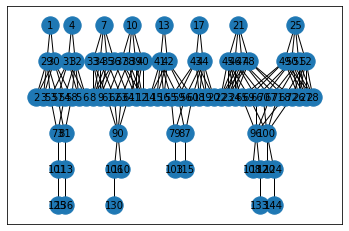

<Figure size 1.08e+06x540000 with 0 Axes>

In [6]:
# Tree pruning in the Assembly of attractor fields
# imports
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np

# Generate the graph with the paths
T = nx.Graph()
# T.add_nodes_from(d_pairs.keys())
T.add_edges_from(l_edges_dict)

# Generate the Layout with dot
pos = graphviz_layout(T, prog="dot")
# Fix the position problem, string to int
aux_pos ={}
for key in pos.keys():
    aux_pos[int(key)] = pos[key]
pos = aux_pos
# Generate the graph with the data an information
nx.draw_networkx(T, pos, font_size=10)
# Show the graph with parameters
plt.figure(figsize=(1200,600), dpi=900)
plt.show()

# Generate full tree for enumerate method

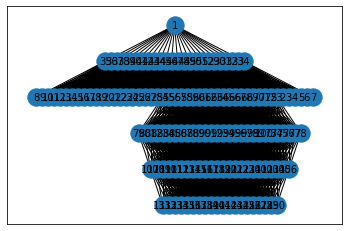

<Figure size 1.08e+06x540000 with 0 Axes>

In [7]:
# Generate the edges
l_aux = []
v_begin = 1
for element in o_rdda.list_signal_pairs:
    l_aux.append(list(range(v_begin , v_begin + len(element))))
    v_begin = v_begin + len(element)
# for element in l_aux:
#     print(element)

l_path_edge = []
for v_index in range(0,len(l_aux)-1):
    l_path_edge = l_path_edge + list(product(l_aux[v_index],l_aux[v_index+1]))
    # print(l_path_edge)

# Generate the graph with the paths
T = nx.Graph()
T.add_edges_from(l_path_edge)

# Generate the Layout with dot
pos = graphviz_layout(T, prog="dot")
# Fix the position problem, string to int
aux_pos ={}
for key in pos.keys():
    aux_pos[int(key)] = pos[key]
pos = aux_pos
# Generate the graph with the data an information
nx.draw_networkx(T, pos, font_size=10)
# Show the graph with parameters
plt.figure(figsize=(1200,600), dpi=900)
plt.show()